In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

In [2]:
prompt6 = "Simulate 1A3N and 7VDE (two PDB IDs matching hemoglobin) with identical parameters. Find the appropriate parameters for simulating hemoglobin from the literature. Then, plot the radius of gyration throughout both simulations."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-08-19
time: 14:17:10
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
agent.run(prompt6)

Thought: First, I need to find the appropriate parameters for simulating hemoglobin from the literature. Then, I can use these parameters to simulate 1A3N and 7VDE and plot the radius of gyration throughout both simulations.

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": "hemoglobin simulation parameters"
}
```
"Molecular dynamics simulation parameters for hemoglobin protein structure prediction"
Search: "Molecular dynamics simulation parameters for hemoglobin protein structure prediction"

Found 11 papers
Thought: I have found the appropriate parameters for simulating hemoglobin from the literature. Now, I can use these parameters to simulate 1A3N and 7VDE and plot the radius of gyration throughout both simulations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N",
    "forcefield_files": ["amber99sbildn.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [9]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1A3N_141833: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_141833
 1A3N_141856: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_141902: Initial positions for simulation sim0_141902
 sim0_141902: Basic Simulation of Protein 1A3N_141856
 rec0_141905: Simulation trajectory for protein 1A3N_141856 and simulation sim0_141902
 rec1_141905: Simulation state log for protein 1A3N_141856 and simulation sim0_141902
 rec2_141905: Simulation pdb frames for protein 1A3N_141856 and simulation sim0_141902
 rgy_rec0_141905: Radii of gyration per frame for rec0_141905
 fig0_142245: Plot of radii of gyration over time for rec0_141905
 7VDE_142249: PDB file downloaded from RSCB
 PDBFile ID: 7VDE_142249
 7VDE_142306: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and

In [5]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-19
time: 14:29:09


In [16]:
from IPython.display import Image
path_1 = registry.get_mapped_path("fig0_142245") + ".png"
path_2 = registry.get_mapped_path("fig0_142906") + ".png"

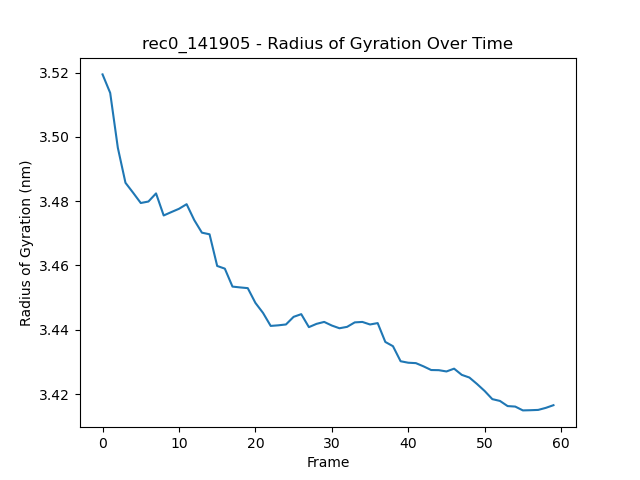

In [14]:
Image(filename=path_1)

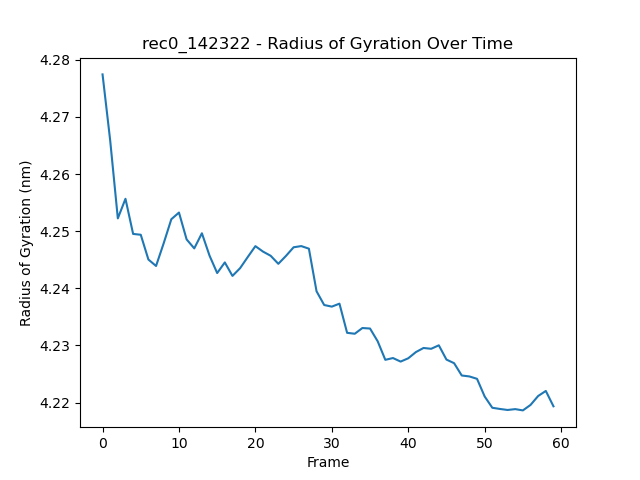

In [17]:
Image(filename=path_2)

In [ ]:
# Experiment Result: ✅❌

### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Completed without Hallucination ✅
### Logic make sense ✅
### Correct Answer ✅ 